<a href="https://colab.research.google.com/github/srikaranreddy13/Data-Science/blob/main/Amazon_Electronic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# data analysis of new data set
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/amazon_products_dataset (1).csv')
print(df.head())

                     title    brand    category  actual_price  discount_price  \
0      Smart Fitness Watch     Dell      Laptop       69890.0         65271.0   
1  Laptop with SSD Storage       LG  Smartwatch       66771.0         63977.0   
2  High Resolution Monitor       Mi  Headphones       43598.0         39679.0   
3         4K Action Camera       HP      Camera       63408.0         58877.0   
4      Smart Fitness Watch  Samsung     Monitor       49224.0         45017.0   

   rating  rating_count  
0     2.6        2128.0  
1     2.5        9118.0  
2     1.9        2517.0  
3     3.7       17533.0  
4     4.9       14228.0  


In [ ]:
print("first 5 rows:",df.head())
print("last 5 rows",df.tail())

first 5 rows:                      title    brand    category  actual_price  discount_price  \
0      Smart Fitness Watch     Dell      Laptop       69890.0         65271.0   
1  Laptop with SSD Storage       LG  Smartwatch       66771.0         63977.0   
2  High Resolution Monitor       Mi  Headphones       43598.0         39679.0   
3         4K Action Camera       HP      Camera       63408.0         58877.0   
4      Smart Fitness Watch  Samsung     Monitor       49224.0         45017.0   

   rating  rating_count  
0     2.6        2128.0  
1     2.5        9118.0  
2     1.9        2517.0  
3     3.7       17533.0  
4     4.9       14228.0  
last 5 rows                                title    brand    category  actual_price  \
1995  Smartphone with AMOLED Display     Dell     Monitor       24140.0   
1996             Smart Fitness Watch       LG  Headphones       65449.0   
1997                4K Action Camera     Dell  Smartphone       21358.0   
1998        Noise Cancelling Ea

In [ ]:
print(df.shape)

(2000, 7)


In [ ]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2000 non-null   object 
 1   brand           2000 non-null   object 
 2   category        1998 non-null   object 
 3   actual_price    1998 non-null   float64
 4   discount_price  1999 non-null   float64
 5   rating          1996 non-null   float64
 6   rating_count    1996 non-null   float64
dtypes: float64(4), object(3)
memory usage: 109.5+ KB
None


In [ ]:
df['category'].unique()

array(['Laptop', 'Smartwatch', 'Headphones', 'Camera', 'Monitor',
       'Speaker', 'Tablet', 'Smartphone', nan], dtype=object)

In [ ]:
df.dtypes


,0
title,object
brand,object
category,object
actual_price,float64
discount_price,float64
rating,float64
rating_count,float64


In [ ]:
df.isnull().sum()


,0
title,0
brand,0
category,2
actual_price,2
discount_price,1
rating,4
rating_count,4


In [ ]:
for col in df.columns:
    print(col, df[col].nunique())




title 10
brand 10
category 8
actual_price 1977
discount_price 1968
rating 41
rating_count 1892


In [ ]:
df.applymap(type).nunique()


/tmp/ipython-input-1465807234.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(type).nunique()


,0
title,1
brand,1
category,2
actual_price,1
discount_price,1
rating,1
rating_count,1


In [ ]:
# filling missing values
numeric_cols = df.select_dtypes(include=['int64','float64']).columns

for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)


/tmp/ipython-input-3795312558.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df[col].fillna("Unknown", inplace=True)


/tmp/ipython-input-148884891.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna("Unknown", inplace=True)


In [ ]:
df.drop_duplicates(inplace=True)


In [ ]:
numeric_like = ["discount_price", "actual_price", "rating", "rating_count"]
for col in numeric_like:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df[numeric_like] = df[numeric_like].fillna(df[numeric_like].median())


In [ ]:
df.reset_index(drop=True, inplace=True)


In [ ]:
top_5_expensive = df.sort_values(by='actual_price', ascending=False).head(5)
top_5_expensive



,title,brand,category,actual_price,discount_price,rating,rating_count
1383,Android Tablet,JBL,Laptop,79993.0,78094.0,3.0,7666.0
1974,Gaming Laptop,LG,Monitor,79869.0,77173.0,2.6,5232.0
1403,4K Action Camera,Sony,Headphones,79857.0,77469.0,2.7,1379.0
1351,Android Tablet,Sony,Monitor,79853.0,78831.0,4.8,7596.0
42,Gaming Laptop,Apple,Smartwatch,79826.0,76919.0,3.8,10252.0


In [ ]:
brand_with_most_products = df['brand'].value_counts().idxmax()
count = df['brand'].value_counts().max()

print("Brand with most products:", brand_with_most_products)
print("Number of products:", count)


Brand with most products: Boat
Number of products: 214


In [ ]:
df['brand'].value_counts()


,count
brand,
Boat,214
LG,208
Sony,208
JBL,207
HP,206
Samsung,205
OnePlus,204
Apple,190
Mi,181


In [ ]:
df['discount_percent'] = (df['actual_price'] - df['discount_price']) / df['actual_price'] * 100
avg_discount_brand = df.groupby('brand')['discount_percent'].mean().sort_values(ascending=False)
avg_discount_brand


,discount_percent
brand,
Apple,12.721996
Boat,12.546502
LG,11.968668
HP,11.501202
OnePlus,11.380987
JBL,11.370137
Dell,11.165004
Sony,10.381971
Mi,10.162308


In [ ]:
high_quality_products = df[(df['rating'] >= 4.5) & (df['rating_count'] >= 2000)]
high_quality_products


,title,brand,category,actual_price,discount_price,rating,rating_count,discount_percent
4,Smart Fitness Watch,Samsung,Monitor,49224.0,45017.0,4.9,14228.0,8.546644
32,4K Action Camera,OnePlus,Smartphone,7793.0,5953.0,4.6,5066.0,23.610933
51,Wireless Bluetooth Headphones,Dell,Headphones,61569.0,59372.0,4.5,13402.0,3.568354
52,Laptop with SSD Storage,Boat,Smartwatch,76286.0,75621.0,5.0,7433.0,0.871720
59,Gaming Laptop,Samsung,Tablet,45250.0,44710.0,4.7,4643.0,1.193370
...,...,...,...,...,...,...,...,...
1949,Portable Bluetooth Speaker,OnePlus,Tablet,59325.0,55777.0,4.5,19070.0,5.980615
1970,Android Tablet,Boat,Camera,20841.0,17765.0,4.5,10252.0,14.759369
1975,Wireless Bluetooth Headphones,Samsung,Smartwatch,31973.0,27058.0,4.5,4288.0,15.372345
1982,Wireless Bluetooth Headphones,HP,Camera,15343.0,10814.0,4.5,7851.0,29.518347


In [ ]:
category_avg_price = df.groupby('category')['actual_price'].mean().sort_values(ascending=False)
category_avg_price


,actual_price
category,
Laptop,40822.874477
Camera,40352.246094
Monitor,39948.259259
Tablet,39943.815217
Speaker,39682.207843
Headphones,39576.147679
Smartwatch,38316.913934
Smartphone,37909.529412
Unknown,33610.500000


In [ ]:
# task-4
df['discount_percent'] = ((df['actual_price'] - df['discount_price']) / df['actual_price']) * 100



In [ ]:
def price_category(price):
    if price < 500:
        return "Budget"
    elif 500 <= price < 2000:
        return "Midrange"
    else:
        return "Premium"

df['price_category'] = df['actual_price'].apply(price_category)


In [ ]:
import numpy as np

df['popularity_score'] = df['rating'] * np.log(df['rating_count'] + 1)


In [ ]:
top_10_popular = df.sort_values(by='popularity_score', ascending=False).head(10)
top_10_popular


,title,brand,category,actual_price,discount_price,rating,rating_count,discount_percent,price_category,popularity_score
1418,Smartphone with AMOLED Display,OnePlus,Laptop,22786.0,22301.0,5.0,18510.0,2.128500,Premium,49.130602
297,Portable Bluetooth Speaker,Samsung,Camera,52713.0,48399.0,5.0,17776.0,8.183939,Premium,48.928304
502,Wireless Bluetooth Headphones,Samsung,Camera,17858.0,14713.0,5.0,16732.0,17.611155,Premium,48.625690
1400,High Resolution Monitor,Dell,Headphones,11025.0,8407.0,5.0,15958.0,23.746032,Premium,48.388891
878,Laptop with SSD Storage,Apple,Smartwatch,4436.0,2614.0,4.9,18895.0,41.073039,Premium,48.248857
1489,High Resolution Monitor,Apple,Laptop,21711.0,20325.0,4.9,18862.0,6.383861,Premium,48.240292
848,High Resolution Monitor,HP,Smartphone,11660.0,9248.0,4.9,18547.0,20.686106,Premium,48.157775
854,Portable Bluetooth Speaker,Samsung,Smartwatch,19284.0,14650.0,4.9,18109.0,24.030284,Premium,48.040676
1625,Gaming Laptop,Dell,Tablet,15099.0,12224.0,5.0,14322.0,19.040996,Premium,47.848110
637,4K Action Camera,Dell,Headphones,35058.0,33177.0,4.9,17254.0,5.365394,Premium,47.803700


In [ ]:
premium_discount = df[(df['price_category'] == "Premium") & (df['discount_percent'] > 40)]
premium_discount


,title,brand,category,actual_price,discount_price,rating,rating_count,discount_percent,price_category,popularity_score
6,Smartphone with AMOLED Display,OnePlus,Laptop,10026.0,5451.0,3.4,18262.0,45.631358,Premium,33.362950
20,4K Action Camera,OnePlus,Headphones,4378.0,103.0,2.7,6412.0,97.647328,Premium,23.668423
53,Noise Cancelling Earbuds,JBL,Camera,2335.0,1338.0,3.4,11284.0,42.698073,Premium,31.726181
74,High Resolution Monitor,Boat,Monitor,5137.0,440.0,1.1,3605.0,91.434690,Premium,9.009390
104,High Resolution Monitor,Sony,Tablet,4933.0,1146.0,2.3,19888.0,76.768701,Premium,22.765221
...,...,...,...,...,...,...,...,...,...,...
1793,High Resolution Monitor,Mi,Headphones,3620.0,1463.0,4.0,17890.0,59.585635,Premium,39.168212
1834,Wireless Bluetooth Headphones,Boat,Headphones,5377.0,790.0,1.4,619.0,85.307792,Premium,9.001607
1841,Noise Cancelling Earbuds,OnePlus,Smartwatch,5877.0,1234.0,3.0,4039.0,79.002893,Premium,24.912000
1875,Wireless Bluetooth Headphones,Dell,Laptop,11037.0,6048.0,1.1,15668.0,45.202501,Premium,10.625383


In [ ]:
bluetooth_products = df[df['title'].str.contains("Bluetooth", case=False, na=False)]
bluetooth_products


,title,brand,category,actual_price,discount_price,rating,rating_count,discount_percent,price_category,popularity_score
14,Portable Bluetooth Speaker,OnePlus,Camera,25516.0,24050.0,1.7,16989.0,5.745415,Premium,16.558646
18,Portable Bluetooth Speaker,Sony,Monitor,73590.0,69414.0,3.8,9759.0,5.674684,Premium,34.906981
21,Wireless Bluetooth Headphones,Samsung,Speaker,78689.0,76240.0,2.9,10196.0,3.112252,Premium,26.766562
23,Portable Bluetooth Speaker,HP,Smartwatch,4342.0,4235.0,1.4,4820.0,2.464302,Premium,11.873031
25,Wireless Bluetooth Headphones,Boat,Monitor,14689.0,13286.0,3.7,1849.0,9.551365,Premium,27.834881
...,...,...,...,...,...,...,...,...,...,...
1975,Wireless Bluetooth Headphones,Samsung,Smartwatch,31973.0,27058.0,4.5,4288.0,15.372345,Premium,37.637140
1979,Wireless Bluetooth Headphones,Sony,Monitor,65124.0,61923.0,3.3,16581.0,4.915239,Premium,32.063041
1982,Wireless Bluetooth Headphones,HP,Camera,15343.0,10814.0,4.5,7851.0,29.518347,Premium,40.358356
1985,Wireless Bluetooth Headphones,Mi,Smartwatch,50527.0,45694.0,2.8,3692.0,9.565183,Premium,22.999744


In [ ]:
pop_cutoff = df['popularity_score'].quantile(0.70)
filtered_products = df[
    (df['rating'] >= 4.0) &
    (df['discount_percent'].between(20, 50)) &
    (df['popularity_score'] >= pop_cutoff)
]
filtered_products


,title,brand,category,actual_price,discount_price,rating,rating_count,discount_percent,price_category,popularity_score
32,4K Action Camera,OnePlus,Smartphone,7793.0,5953.0,4.6,5066.0,23.610933,Premium,39.240319
94,Smart Fitness Watch,HP,Monitor,16289.0,12756.0,4.4,19798.0,21.689484,Premium,43.530902
107,High Resolution Monitor,JBL,Smartphone,7308.0,4789.0,4.3,19050.0,34.469075,Premium,42.375962
140,Gaming Laptop,Sony,Tablet,11869.0,8696.0,5.0,3124.0,26.733507,Premium,40.235948
162,Android Tablet,Apple,Speaker,11918.0,8193.0,4.6,14639.0,31.255244,Premium,44.120959
165,Wireless Bluetooth Headphones,Apple,Smartwatch,7654.0,4236.0,4.3,15314.0,44.656389,Premium,41.437328
188,Portable Bluetooth Speaker,LG,Smartphone,10227.0,5248.0,4.4,19440.0,48.684854,Premium,43.450614
215,Wireless Bluetooth Headphones,Apple,Camera,16855.0,12030.0,4.9,13597.0,28.626520,Premium,46.636622
274,Smartphone with AMOLED Display,Sony,Speaker,6770.0,5282.0,4.9,15245.0,21.979321,Premium,47.197155
404,Portable Bluetooth Speaker,Samsung,Laptop,14978.0,11330.0,4.4,14550.0,24.355722,Premium,42.175826


In [ ]:
avg_discount_per_brand = df.groupby('brand')['discount_percent'].mean().sort_values(ascending=False)
avg_discount_per_brand


,discount_percent
brand,
Apple,12.721996
Boat,12.546502
LG,11.968668
HP,11.501202
OnePlus,11.380987
JBL,11.370137
Dell,11.165004
Sony,10.381971
Mi,10.162308


In [ ]:
avg_popularity_by_price_cat = df.groupby('price_category')['popularity_score'].mean()
avg_popularity_by_price_cat


,popularity_score
price_category,
Budget,38.147220
Midrange,23.660324
Premium,26.365816


In [ ]:
category_highest_discount = df.groupby('category')['discount_percent'].mean().sort_values(ascending=False)
category_highest_discount


,discount_percent
category,
Headphones,12.602766
Smartwatch,12.028735
Unknown,11.720852
Smartphone,11.516450
Tablet,11.366701
Laptop,11.207555
Speaker,10.879103
Camera,10.619470
Monitor,10.089122


In [ ]:
df['revenue_potential'] = df['actual_price'] * df['rating_count']
brand_revenue = df.groupby('brand')['revenue_potential'].sum().sort_values(ascending=False)
brand_revenue


,revenue_potential
brand,
HP,8.297444e+10
OnePlus,8.247380e+10
LG,8.156630e+10
Samsung,8.117230e+10
Sony,7.929952e+10
Boat,7.744207e+10
JBL,7.723438e+10
Mi,7.698029e+10
Dell,7.549826e+10


In [ ]:
# export dataset
df.to_csv('/content/drive/MyDrive/amazon_prodoucts.csv', index=False)
print("File successfully saved in Google Drive as cleaned_house_price.csv")

File successfully saved in Google Drive as cleaned_house_price.csv


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


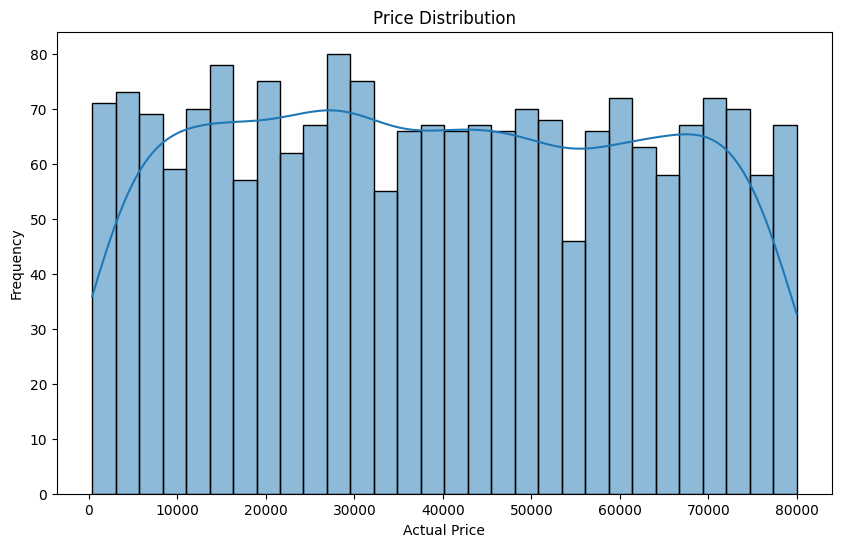

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['actual_price'], kde=True, bins=30)
plt.title("Price Distribution")
plt.xlabel("Actual Price")
plt.ylabel("Frequency")
plt.show()


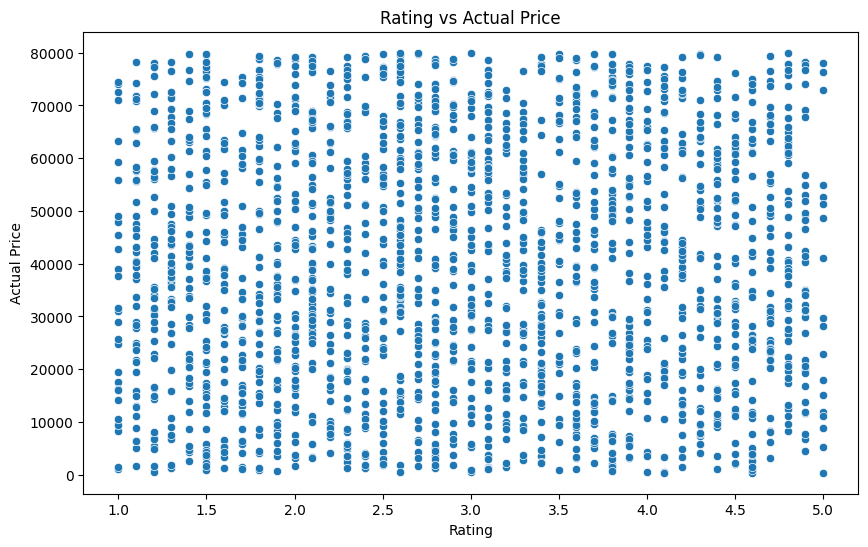

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='rating', y='actual_price')
plt.title("Rating vs Actual Price")
plt.xlabel("Rating")
plt.ylabel("Actual Price")
plt.show()


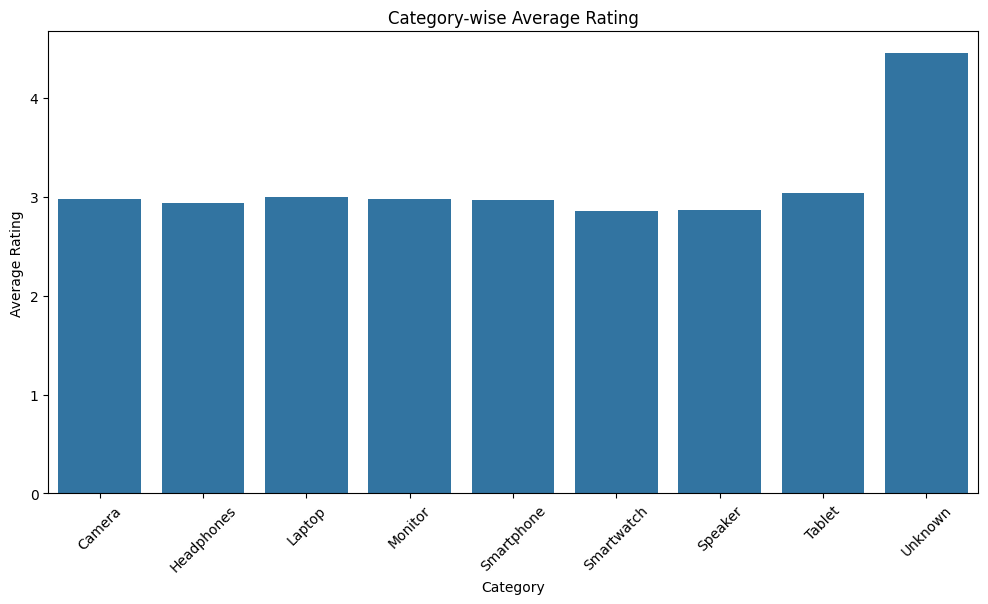

In [ ]:
category_avg_rating = df.groupby('category')['rating'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=category_avg_rating, x='category', y='rating')
plt.title("Category-wise Average Rating")
plt.xlabel("Category")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()


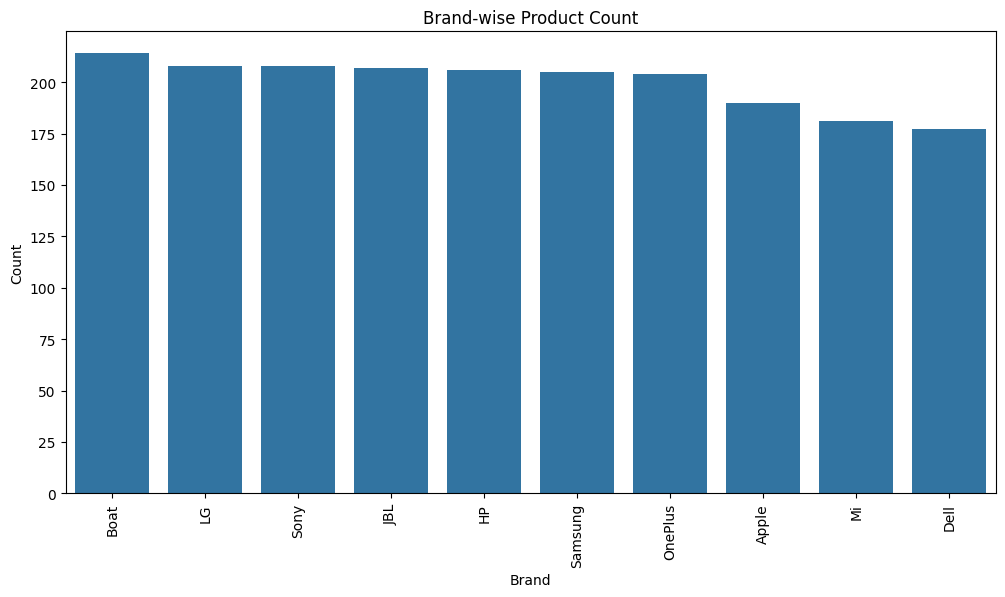

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='brand', order=df['brand'].value_counts().index)
plt.title("Brand-wise Product Count")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()


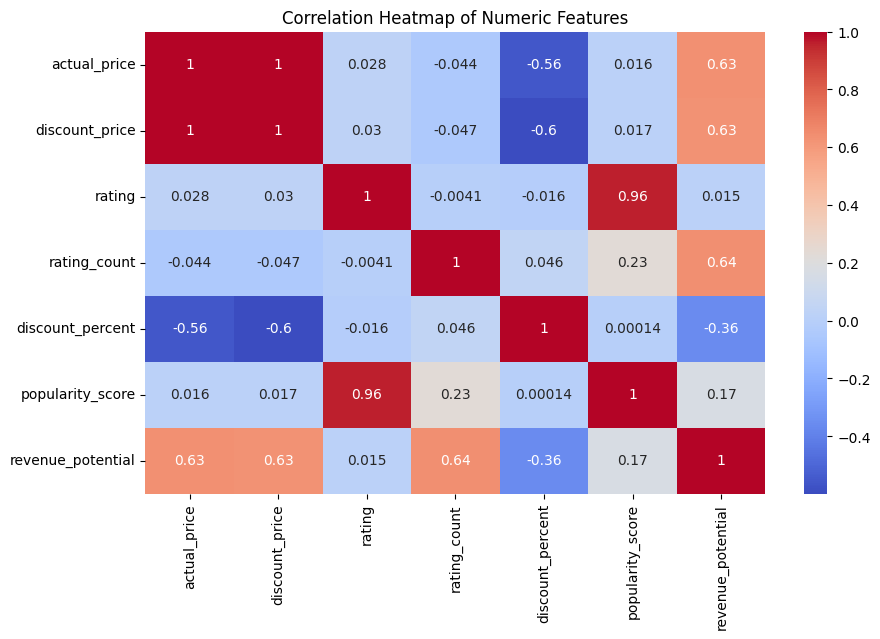

In [ ]:
numeric_df = df.select_dtypes(include=['int64','float64'])
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()
